# Data Exploration for ML Use Case 2

In this notebook, we're delving into damage assessment dataset. Our goal is to perform exploratory data analysis (EDA). Specifically, we will set up the data paths appropriately, load the dataset and explore the dataset for preprocessing with diverse visualization techniques.

In [2]:
# import necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

### 1. Set Up Data Paths and Load the data

In [4]:
# Define the path to the metadata and image directory
meta_data_dir = "../damage_assessment/Dataset_Info.csv"
image_dir = "../damage_assessment/images"

# Load the dataset information from the meta data file
dataset_info = pd.read_csv(meta_data_dir)
# Drop the 'Unnamed:4" column from the dataframe
dataset_info = dataset_info.drop(columns=['Unnamed: 4'])
dataset_info.head()

,Image ID,Pothole,Number of Potholes,Level
0,pothole_image_1299,1,3,B
1,pothole_image_10064,1,1,A
2,pothole_image_10079,1,1,A
3,pothole_image_10084,1,1,A
4,pothole_image_10087,1,2,A


In [5]:
# Add a new column 'Image path' to the dataframe containing the path to each image file
dataset_info['Image_Path'] = dataset_info['Image ID'].apply(lambda x: os.path.join(image_dir, x + '.jpg'))

In [6]:
dataset_info.head()

,Image ID,Pothole,Number of Potholes,Level,Image_Path
0,pothole_image_1299,1,3,B,../damage_assessment/images\pothole_image_1299...
1,pothole_image_10064,1,1,A,../damage_assessment/images\pothole_image_1006...
2,pothole_image_10079,1,1,A,../damage_assessment/images\pothole_image_1007...
3,pothole_image_10084,1,1,A,../damage_assessment/images\pothole_image_1008...
4,pothole_image_10087,1,2,A,../damage_assessment/images\pothole_image_1008...


### 2. Explore the Data 

#### Distribution of number of potholes

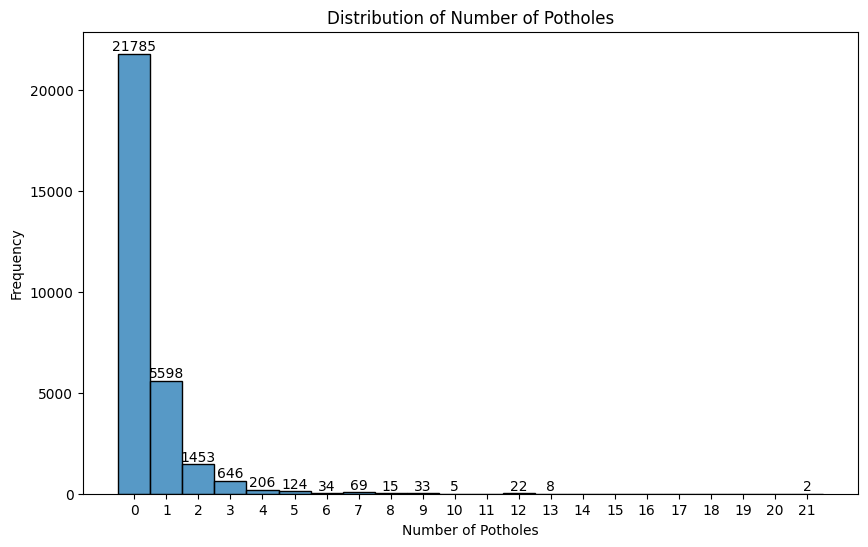

In [6]:
plt.figure(figsize=(10, 6))
bins = np.arange(dataset_info['Number of Potholes'].max() + 2) - 0.5
ax = sns.histplot(dataset_info['Number of Potholes'], bins=bins, kde=False)
plt.xticks(np.arange(dataset_info['Number of Potholes'].max() + 1))
plt.title('Distribution of Number of Potholes')
plt.xlabel('Number of Potholes')
plt.ylabel('Frequency')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

* The distribution of the number of potholes is highly skewed to the right. Most of the images have zero or very few potholes.
* There is a significant imbalance in the dataset. We need to conduct the techniques such as oversampling, undersampling to address this imbalance.

#### Distribution of severity level

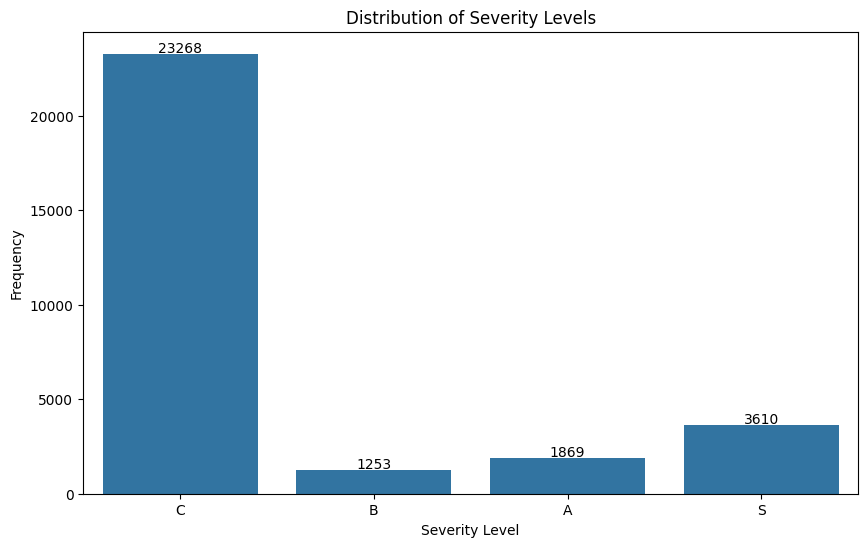

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Level', data=dataset_info, order=['C', 'B', 'A', 'S'])
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate(f'\n{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

* The distribution of severity levels is highly skewed towards the 'C' level, indicating the most images have a low severity level.
* Data imbalance problem as we mentioned above.

#### Sample image visualization by severity level

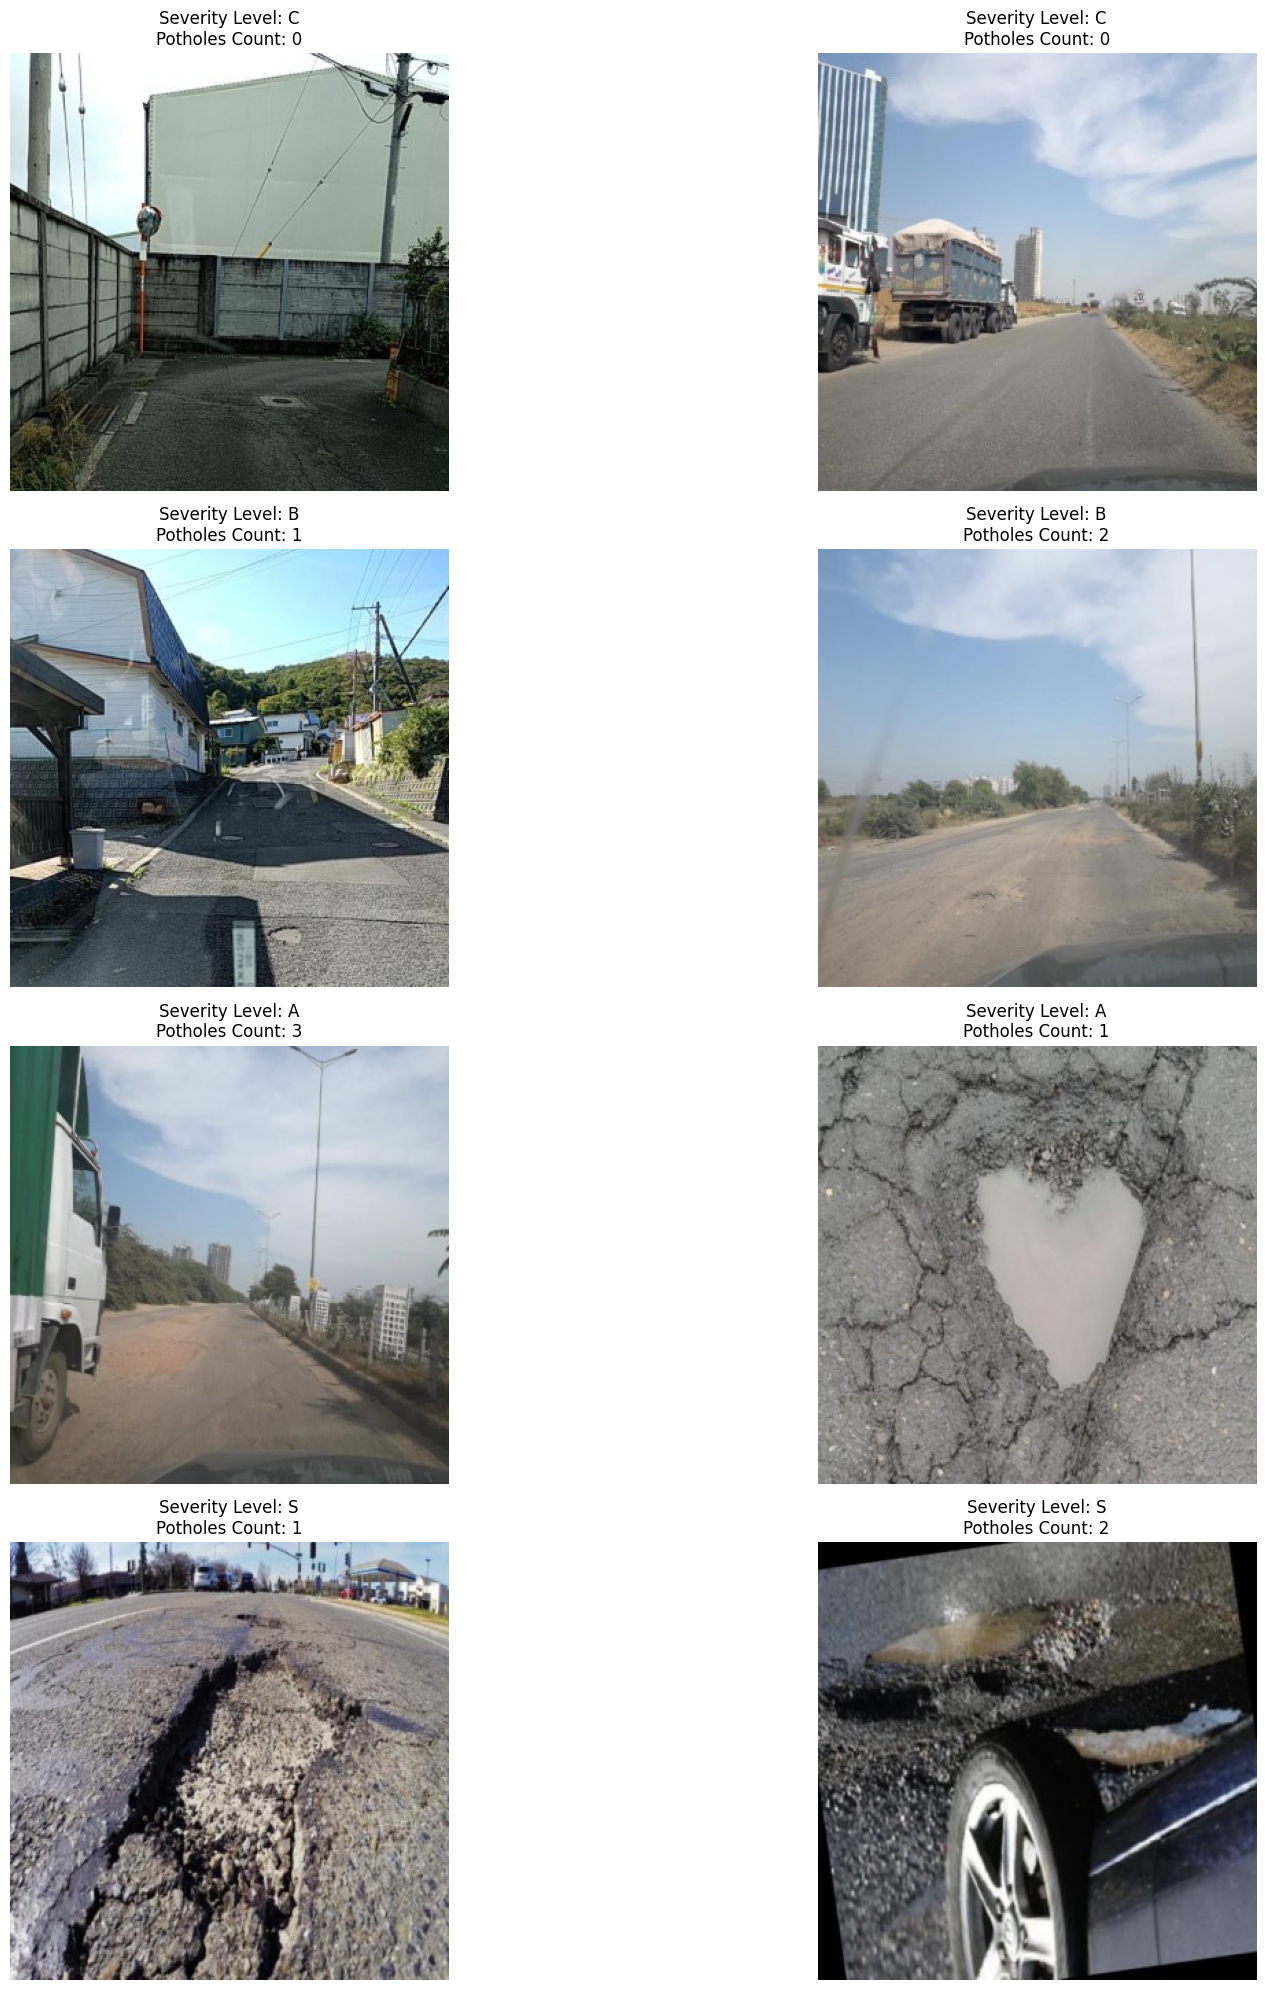

In [8]:
def display_sample_images_by_severity(df, num_samples_per_level=2):
    levels = ['C', 'B', 'A', 'S']
    plt.figure(figsize=(20, 20))
    total_samples = num_samples_per_level * len(levels)
    sample_count = 1

    for level in levels:
        level_df = df[df['Level'] == level]
        sampled_df = level_df.sample(n=num_samples_per_level, replace=False)
        for _, row in sampled_df.iterrows():
            img_path = row['Image_Path']
            img = Image.open(img_path)
            plt.subplot(len(levels), num_samples_per_level, sample_count)
            plt.imshow(img)
            plt.title(f"Severity Level: {row['Level']}\nPotholes Count: {row['Number of Potholes']}")
            plt.axis('off')
            sample_count += 1

    plt.tight_layout()
    plt.show()

display_sample_images_by_severity(dataset_info, num_samples_per_level=2)

#### correlation matrix

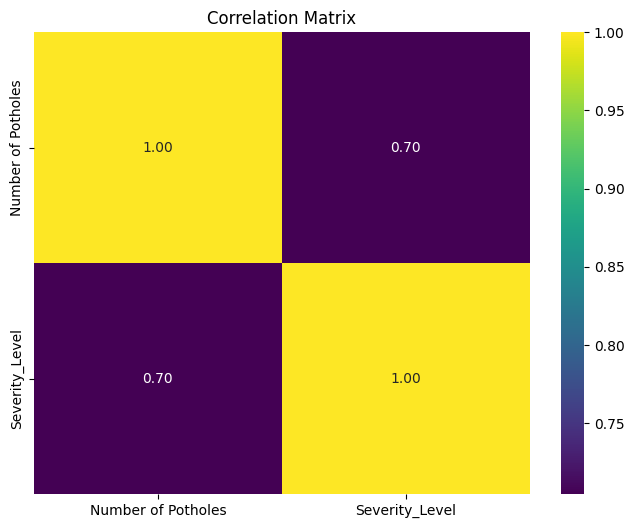

In [9]:
severity_mapping = {'C': 0, 'B': 1, 'A': 2, 'S': 3}
dataset_info['Severity_Level'] = dataset_info['Level'].map(severity_mapping)

correlation_matrix = dataset_info[['Number of Potholes', 'Severity_Level']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


* Correlation coefficient: 0.7
* There is a strong positive correlation between the number of potholes and the severity level. This means that as the number of potholes increases, the severity level tends to be higher.